In [1]:
import tensorflow as tf
import numpy as np
import tensorflow 
import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tensorflow.keras.models import Model
import shap
import torch
from torchvision import models, transforms
from PIL import Image

# CLASS_NAMES = ('Normal', 'Pneumonia', 'COVID-19')
#order of index 

In [2]:
path = '/Users/sumlipuri/Desktop/plant_disease_detection-main/plant_village_denseNet.h5'
model = tf.keras.models.load_model(path)

In [13]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/sumlipuri/Desktop/plant_disease_detection-main/DataSet/color",
    shuffle=True,
    image_size=(256,256),
    batch_size= 32
)

Found 54305 files belonging to 38 classes.


In [14]:
class_names= dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [3]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [4]:
def single_img(link):
    image = cv2.imread(link)
    imm = []
    image = cv2.resize(image, (256,256))
    image = img_to_array(image)
    imm.append(image)
    return np.array(imm)

In [5]:
path =  '/Users/sumlipuri/Desktop/plant_disease_detection-main/DataSet/color/Tomato___Septoria_leaf_spot/0a5edec2-e297-4a25-86fc-78f03772c100___JR_Sept.L.S 8468.JPG'
image1 = single_img(path)
image3d1 = cv2.imread(path)


In [16]:
masker = shap.maskers.Image("inpaint_telea", (256,256,3))
class_name = class_names

In [17]:
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

In [18]:
e = shap.Explainer(f, masker, output_names=class_name)

In [23]:
shap_values3 = e(image1,  max_evals=1000, batch_size=32, outputs=shap.Explanation.argsort.flip[:5])

PartitionExplainer explainer: 2it [04:20, 260.12s/it]              


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


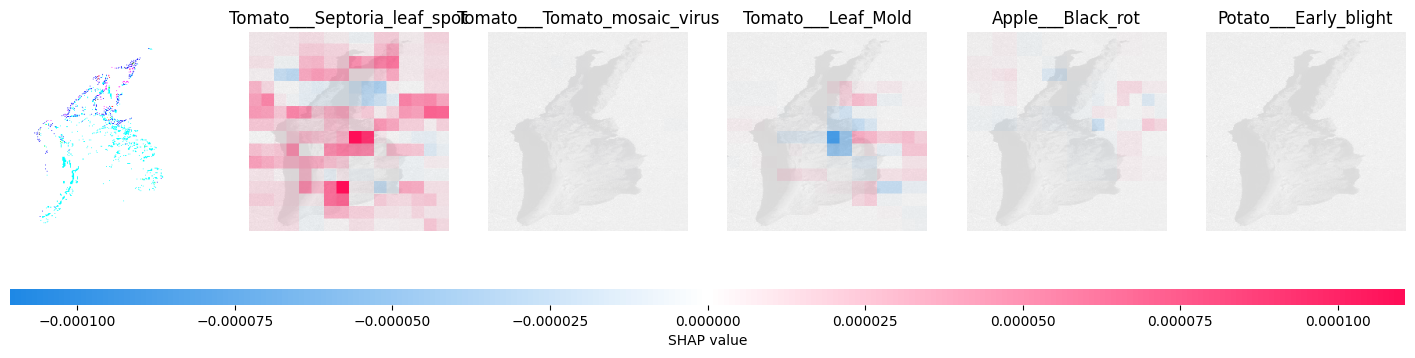

In [24]:
shap.image_plot(shap_values3, show = False)